In [167]:
from __future__ import print_function
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import metrics, cross_validation
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import KFold

In [168]:
# multiple and Logistic regression model to determine Happiness Score based on Economy GDP per Capita Family Health Life Expectancy Freedom Generosity Trust Government Corruption. Dystopia Residual Martial Status

Data Loading

In [169]:
data=pd.read_csv('2017.csv')

In [170]:
data

,Country,Region,Happiness Rank,Happiness Score,Whisker high,Whisker low,Economy GDP per Capita.,Family,Health Life Expectancy,Freedom,Generosity,Trust Government Corruption.,Dystopia Residual,Martial Status,Happiness Level,Conclusion
0,Norway,Western Europe,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,1,level 4,Happy
1,Denmark,Western Europe,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,1,level 4,Happy
2,Iceland,Western Europe,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,1,level 2,Very Happy
3,Switzerland,Western Europe,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,0,level 3,Very Happy
4,Finland,North America,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,1,level 2,Happy
5,Netherlands,Western Europe,6,7.377,7.427426,7.326574,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804,0,level 4,Happy
6,Canada,Western Europe,7,7.316,7.384403,7.247597,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264,0,level 3,Happy
7,New Zealand,Western Europe,8,7.314,7.379510,7.248490,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456,1,level 4,Very Happy
8,Sweden,Australia and New Zealand,9,7.284,7.344095,7.223905,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538,0,level 3,Very Happy
9,Australia,Australia and New Zealand,10,7.284,7.356651,7.211349,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211,1,level 4,Very Happy


Data description

In [171]:
data.describe()

,Happiness Rank,Happiness Score,Whisker high,Whisker low,Economy GDP per Capita.,Family,Health Life Expectancy,Freedom,Generosity,Trust Government Corruption.,Dystopia Residual,Martial Status
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,77.500000,5.371299,5.469127,5.273470,0.991112,1.196618,0.554799,0.409682,0.246663,0.123552,1.848837,0.558442
std,44.600075,1.114210,1.102394,1.127151,0.414542,0.271590,0.233891,0.150070,0.135192,0.101849,0.501354,0.498193
min,1.000000,2.905000,3.074690,2.735310,0.022643,0.396103,0.000000,0.000000,0.000000,0.000000,0.377914,0.000000
25%,39.250000,4.519250,4.616703,4.377365,0.679481,1.049448,0.380798,0.307313,0.153590,0.057931,1.587952,0.000000
50%,77.500000,5.286000,5.380905,5.193687,1.066948,1.254751,0.609627,0.438880,0.231521,0.089914,1.829808,1.000000
75%,115.750000,6.103250,6.195921,6.012285,1.319453,1.415360,0.724903,0.517596,0.324529,0.153411,2.147727,1.000000
max,154.000000,7.537000,7.622030,7.479556,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485,1.000000


In [172]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 16 columns):
Country                         154 non-null object
Region                          154 non-null object
Happiness Rank                  154 non-null int64
Happiness Score                 154 non-null float64
Whisker high                    154 non-null float64
Whisker low                     154 non-null float64
Economy GDP per Capita.         154 non-null float64
Family                          154 non-null float64
Health Life Expectancy          154 non-null float64
Freedom                         154 non-null float64
Generosity                      154 non-null float64
Trust Government Corruption.    154 non-null float64
Dystopia Residual               154 non-null float64
Martial Status                  154 non-null int64
Happiness Level                 154 non-null object
Conclusion                      154 non-null object
dtypes: float64(10), int64(2), object(4)
memory usage: 

In [173]:
data.head()

,Country,Region,Happiness Rank,Happiness Score,Whisker high,Whisker low,Economy GDP per Capita.,Family,Health Life Expectancy,Freedom,Generosity,Trust Government Corruption.,Dystopia Residual,Martial Status,Happiness Level,Conclusion
0,Norway,Western Europe,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,1,level 4,Happy
1,Denmark,Western Europe,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,1,level 4,Happy
2,Iceland,Western Europe,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,1,level 2,Very Happy
3,Switzerland,Western Europe,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,0,level 3,Very Happy
4,Finland,North America,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,1,level 2,Happy


In [174]:
data.apply(lambda x: sum(x.isnull()),axis=0)

Country                         0
Region                          0
Happiness Rank                  0
Happiness Score                 0
Whisker high                    0
Whisker low                     0
Economy GDP per Capita.         0
Family                          0
Health Life Expectancy          0
Freedom                         0
Generosity                      0
Trust Government Corruption.    0
Dystopia Residual               0
Martial Status                  0
Happiness Level                 0
Conclusion                      0
dtype: int64

Data is clean

In [175]:
data.shape

(154, 16)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

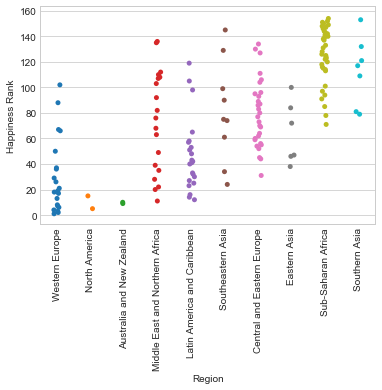

In [176]:
g = sns.stripplot(x="Region", y="Happiness Rank", data=data, jitter=True)
plt.xticks(rotation=90)

#### The need of multiple regression  : Regress 'Family' and 'Health Life Expectancy' on 'Happiness Score'

In [177]:
corr=data.corr()
corr

,Happiness Rank,Happiness Score,Whisker high,Whisker low,Economy GDP per Capita.,Family,Health Life Expectancy,Freedom,Generosity,Trust Government Corruption.,Dystopia Residual,Martial Status
Happiness Rank,1.000000,-0.993970,-0.994098,-0.992853,-0.809302,-0.739723,-0.775803,-0.548096,-0.136797,-0.402955,-0.494419,0.043535
Happiness Score,-0.993970,1.000000,0.999484,0.999507,0.805470,0.744847,0.774181,0.567905,0.162125,0.427402,0.491247,-0.048178
Whisker high,-0.994098,0.999484,1.000000,0.997983,0.804969,0.743582,0.768794,0.567560,0.162169,0.424637,0.494365,-0.050742
Whisker low,-0.992853,0.999507,0.997983,1.000000,0.805157,0.745341,0.778677,0.567677,0.161920,0.429680,0.487709,-0.045622
Economy GDP per Capita.,-0.809302,0.805470,0.804969,0.805157,1.000000,0.675419,0.837519,0.363357,-0.015436,0.347688,0.031412,0.023229
Family,-0.739723,0.744847,0.743582,0.745341,0.675419,1.000000,0.594928,0.425738,0.062106,0.227548,0.087257,-0.005603
Health Life Expectancy,-0.775803,0.774181,0.768794,0.778677,0.837519,0.594928,1.000000,0.342961,0.068040,0.275094,0.062373,0.063776
Freedom,-0.548096,0.567905,0.567560,0.567677,0.363357,0.425738,0.342961,1.000000,0.318546,0.497319,0.084806,-0.030823
Generosity,-0.136797,0.162125,0.162169,0.161920,-0.015436,0.062106,0.068040,0.318546,1.000000,0.295714,-0.117434,0.100537
Trust Government Corruption.,-0.402955,0.427402,0.424637,0.429680,0.347688,0.227548,0.275094,0.497319,0.295714,1.000000,-0.020951,0.019447


## Checking if the relationship is significant

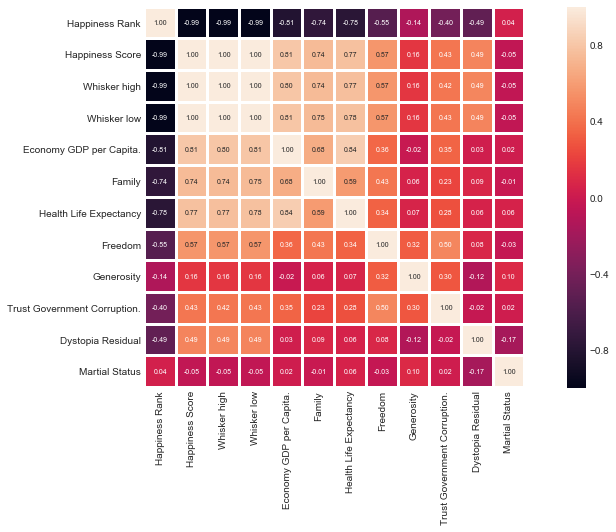

In [178]:
plt.figure(figsize=(15,7))
sns.heatmap(corr, cbar = True, square = True, annot=True, linewidths = 2, fmt='.2f',annot_kws={'size':7}) 
#sns.plt.title('Heatmap of Correlation Matrix')
plt.show()

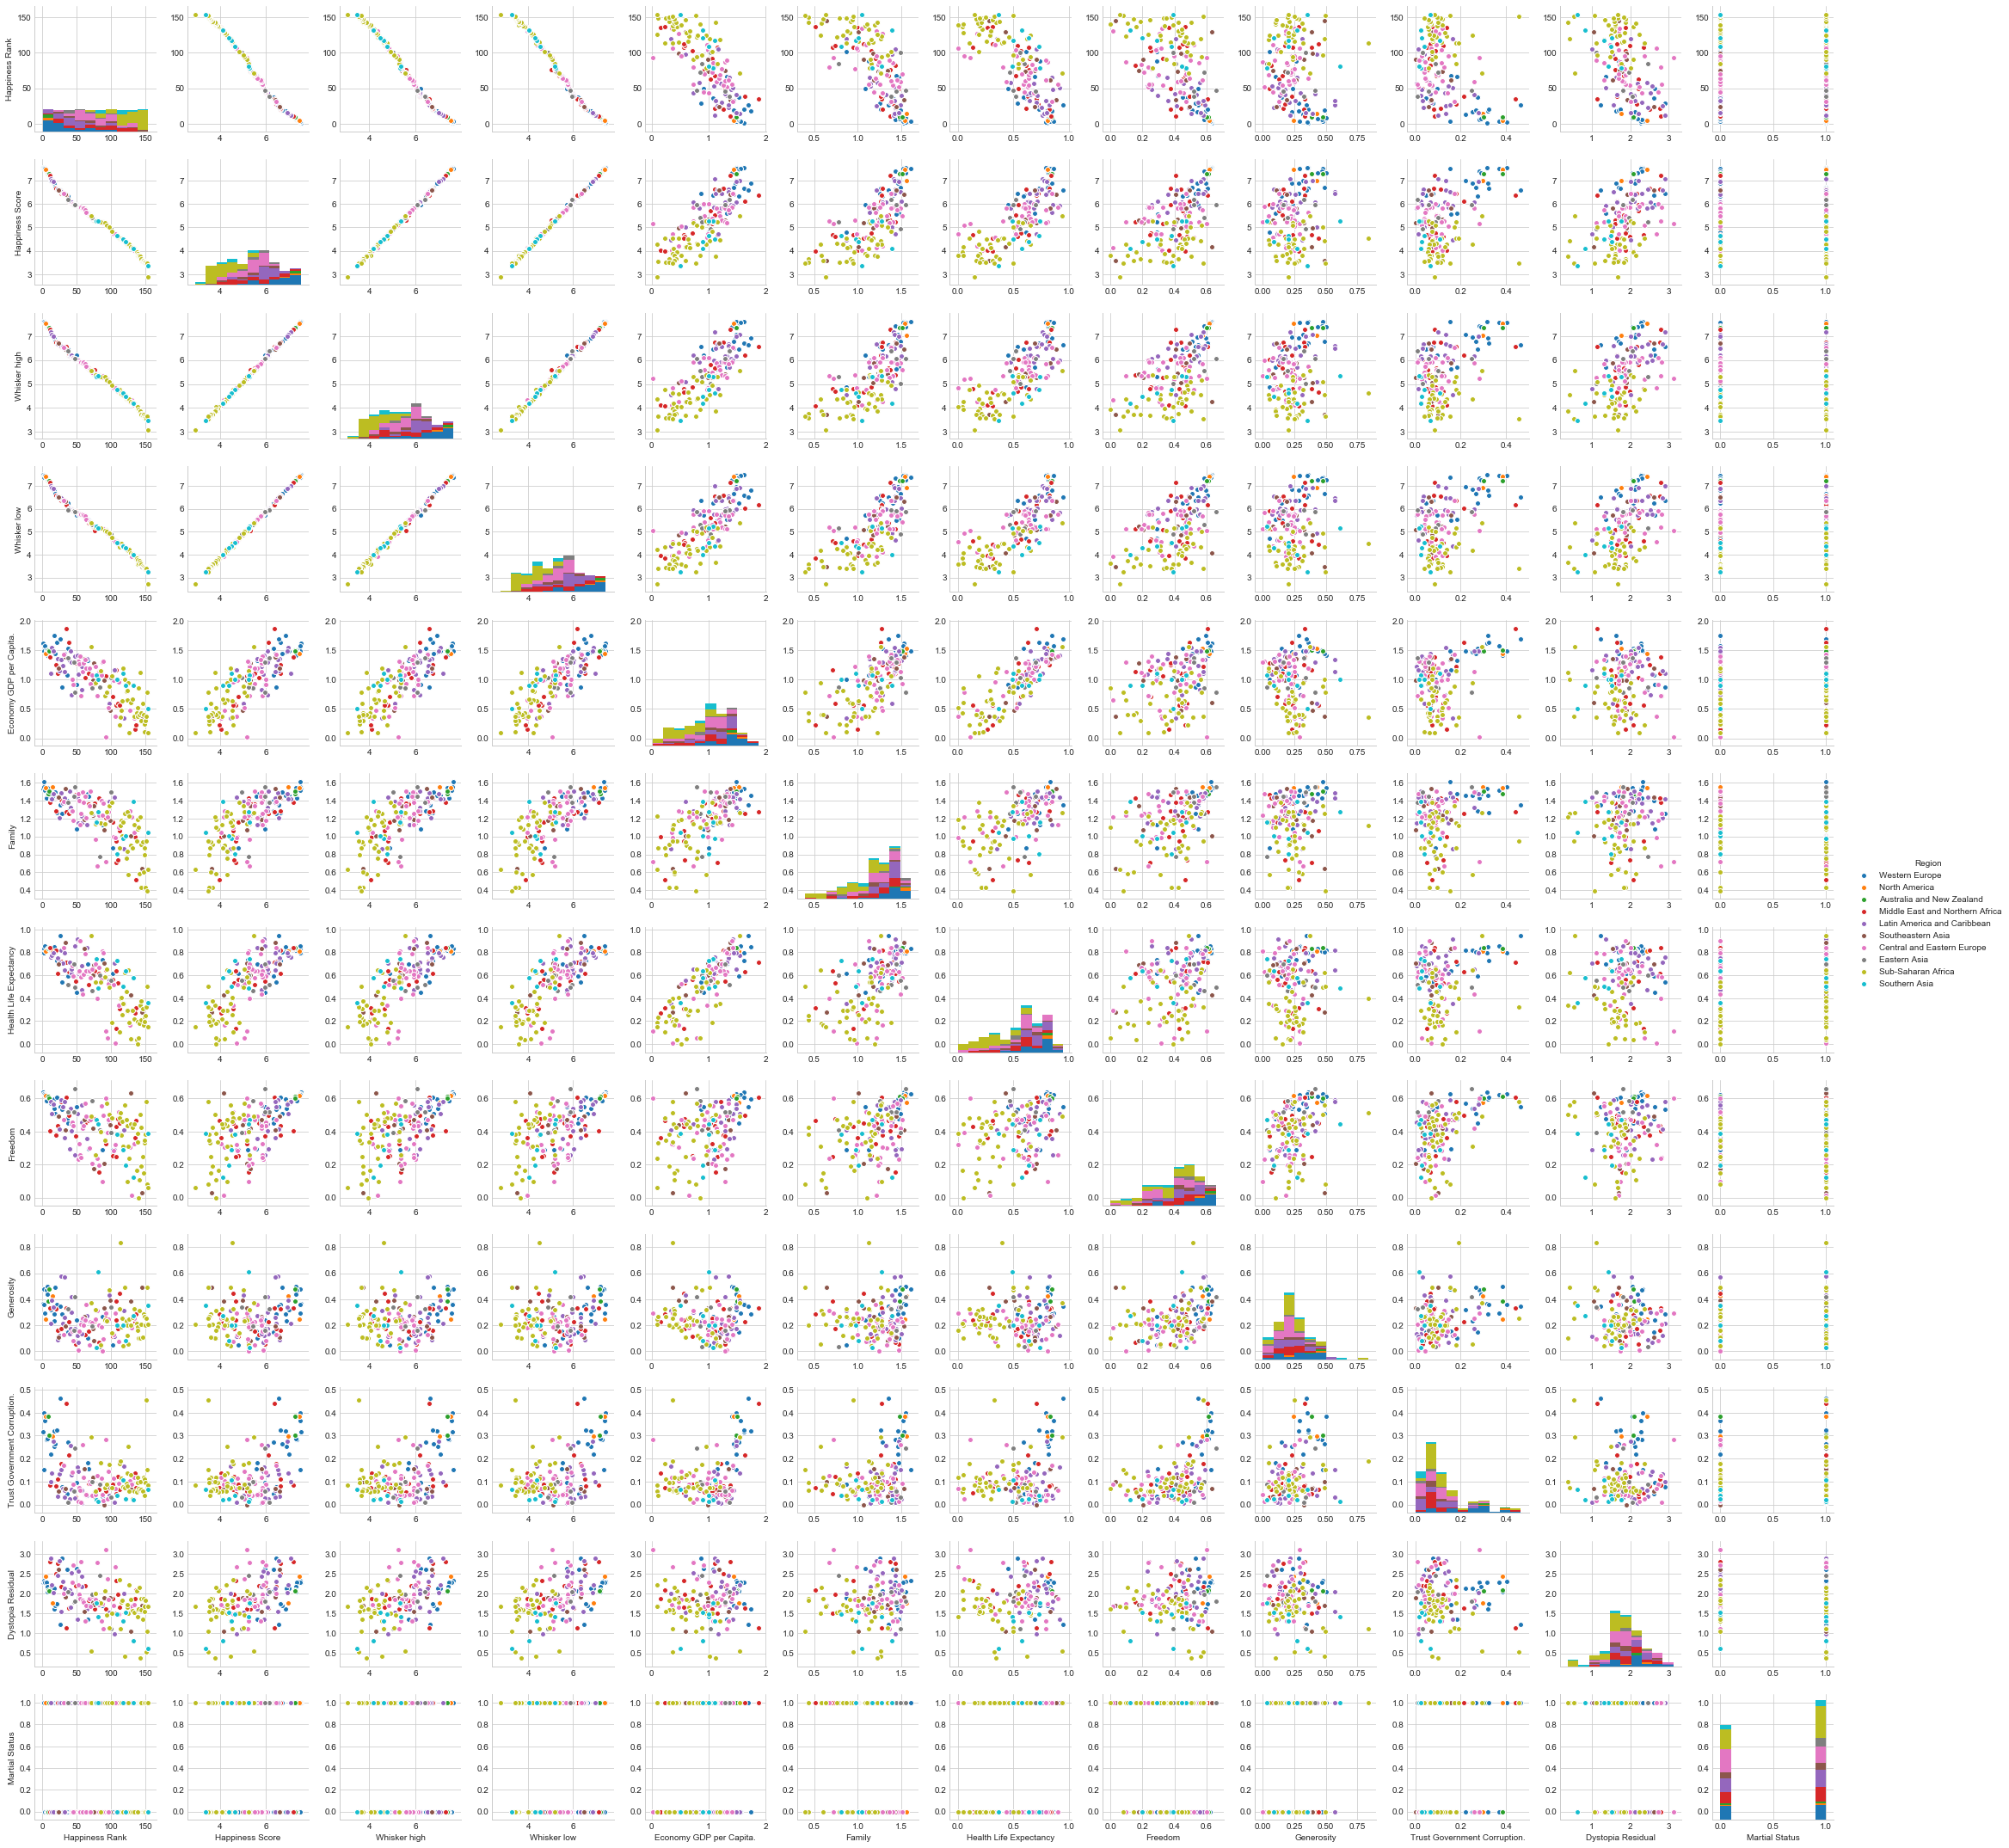

In [179]:
sns.pairplot(data, hue="Region")
#plt.show()

### Checking if any assumptions are violated!!

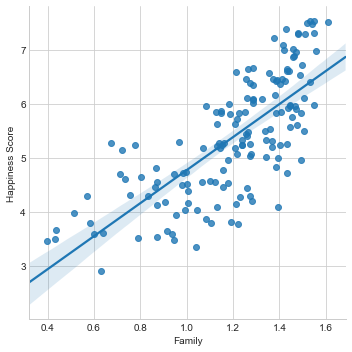

In [180]:
sns.lmplot(y="Happiness Score", x="Family", data=data)
#3sns.plt.show()

##### As family is the dependant variable, family is correlated to Happiness Score and not violating the assumptions

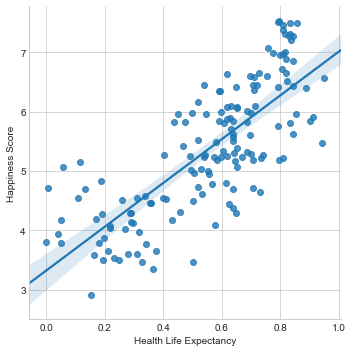

In [181]:
sns.lmplot(y="Happiness Score", x="Health Life Expectancy", data=data)
#sns.plt.show()

##### As Health Life Expectancy is the dependant variable, Health Life Expectancy is correlated to Happiness Score and not violating the assumptions

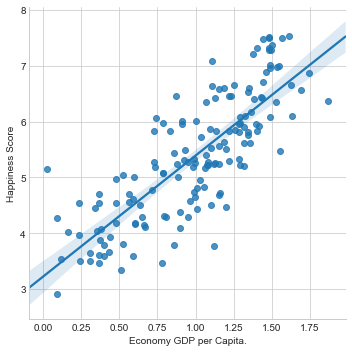

In [182]:
sns.lmplot(y="Happiness Score", x="Economy GDP per Capita.", data=data)
#sns.plt.show()

##### As Economy GDP per Capita. is the dependant variable, Economy GDP per Capita. is correlated to Happiness Score and not violating the assumptions

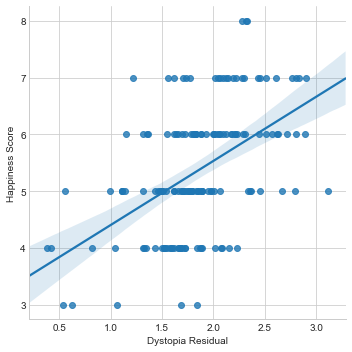

In [545]:
sns.lmplot(y="Happiness Score", x="Dystopia Residual", data=data)

##### As Dystopia Residual is the dependant variable, Dystopia Residual is correlated to Happiness Score and not violating the assumptions

#### Assumption 2 : Checking if all independent variables are not correlated to each other

###  Checking if predictior variables are independent

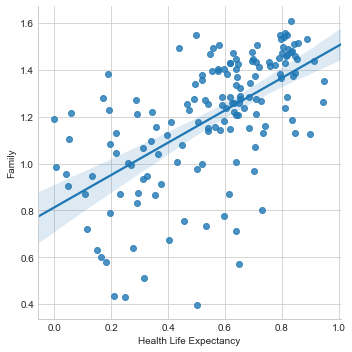

In [183]:
sns.lmplot(y="Family", x="Health Life Expectancy", data=data)
#sns.plt.show()

##### Seems like family and Health Life Expectancy are correlated  to each other. So we can take either family or Health Life Expectancy

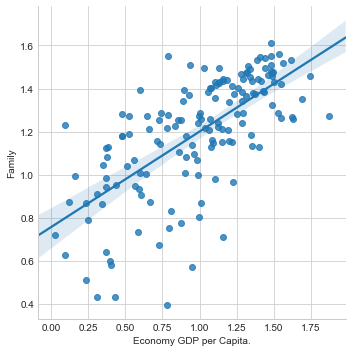

In [184]:
sns.lmplot(y="Family", x="Economy GDP per Capita.", data=data)
#sns.plt.show()

#### Seems like family and Economy GDP per Capita  are correlated to each other. So we can take either family or Economy GDP per Capita

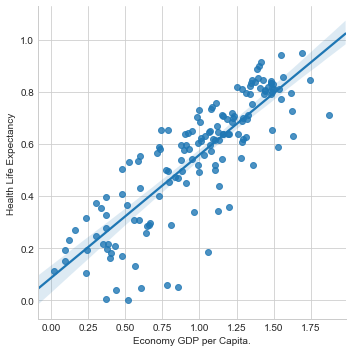

In [185]:
sns.lmplot(y="Health Life Expectancy", x="Economy GDP per Capita.", data=data)
#sns.plt.show()

#### Seems like Health Life Expectancy and Economy GDP per Capita  are correlated to each other. So we can take either Health Life Expectancy or Economy GDP per Capita

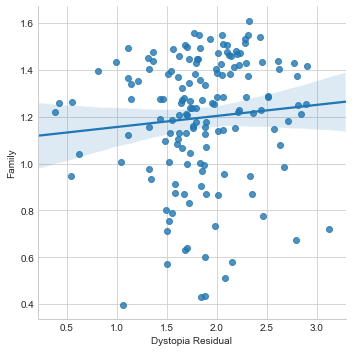

In [546]:
sns.lmplot(y="Family", x="Dystopia Residual", data=data)

##### Seems like Family and Dystopia Residual are not correlated to each other. So we can take both Family and Dystopia Residual.

In [548]:
features = data[['Economy GDP per Capita.','Family','Health Life Expectancy','Dystopia Residual','Country']]

In [549]:
corr=features.corr()

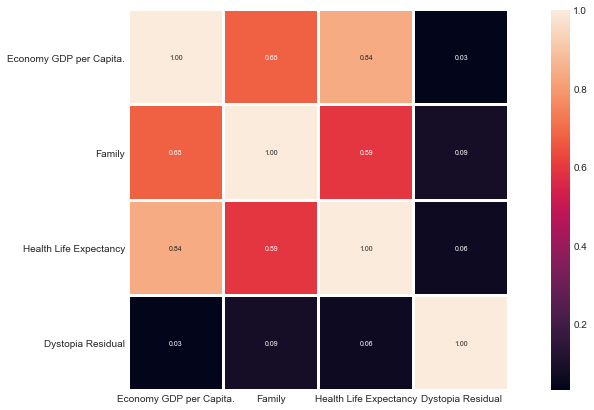

In [550]:
plt.figure(figsize=(15,7))
sns.heatmap(corr, cbar = True, square = True, annot=True, linewidths = 2, fmt='.2f',annot_kws={'size':7}) 
#sns.plt.title('Heatmap of Correlation Matrix')
#plt.show()

## Ranking the most Significant predictor and ignoring rest

In [564]:
features = data[['Family','Dystopia Residual','Country']]

In [565]:
corr=features.corr()

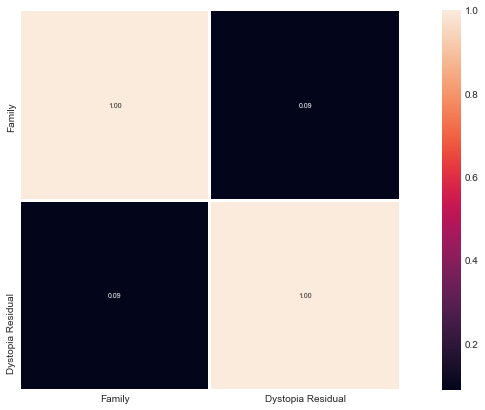

In [566]:
plt.figure(figsize=(15,7))
sns.heatmap(corr, cbar = True, square = True, annot=True, linewidths = 2, fmt='.2f',annot_kws={'size':7}) 
#sns.plt.title('Heatmap of Correlation Matrix')
#plt.show()